<h1 style="text-align:center;">Лабораторная работа №1</h1>

<h2 style="text-align:center;">Решение задачи экстраполяции различными методами</h2>

<h3 style="text-align:center;">Тулупов Николай Дмитриевич</h3>
<h3 style="text-align:center;">Б01-204</h3>


Цель: решить выбранную задачу перечисленными методами: 
1. Классическая полиномиальная интерполяция по Ньютону
2. Сплайн-интерполяция
3. Метод наименьших квадратов

В чем суть?

**Аппроксимация** — научный метод, состоящий в замене одних объектов другими, в каком-то смысле близкими к исходным, но более простыми.Простыми словами, аппроксимировать — это заменить одни результаты другими, близкими к исходным, но упрощёнными. 

**Интерполяция** - нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом.


**Экстраполяция** - особый тип аппроксимации, при котором функция аппроксимируется вне заданного интервала, а не между заданными значениями. Иными словами, экстраполяция — приближённое определение значений функции $f(x)$ в точках $x$,
 лежащих вне отрезка $[x_{0},x_{n}]$, по её значениям в точках $x_{0}<x_{1}<...<x_{n}$.


<img src="image.png" alt="drawing" width="650"/>


Итак, с помощью аппроксимации мы находим функцию приближенным методом. 

С помощью интерполяции или экстраполяции находим значение нужных точек внутри таблицы или за её пределами.

<img src="task_lab_4.png" alt="drawing" width="650"/>

In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [109]:
#запишем данные о населении США в 20 веке в массивы
x = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000] #годы
y = [92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906] #население

x_true = [2010]
y_true = [308745538]
#x = [1910, 1920, 1930,1940] #годы
#y = [92228496, 106021537, 123202624,132164569] #население


**1) Классическая полиномиальная интерполяция по Ньютону.**

<img src="sep_diff_.png" alt="drawing" width="580"/>
<img src="sep_diff.png" alt="drawing" width="650"/>

Сначала посчитаем разделенные разности для данных и используем эту функцию в основной.

In [110]:
# функция вычисляет разделенные разности
def sep_diff(x, y):
    n = len(x) #количество данных
    dif = np.zeros([n, n])
    
    for i in range(n):
        dif[i, 0] = y[i]  # Первая колонка - значения y
    
    for j in range(1, n): #столбцы все кроме 0го
        for i in range(n - j): # строки - от 0 по n-j-1
            dif[i][j] = (dif[i + 1][j - 1] - dif[i][j - 1]) / (x[i + j] - x[i])
    
    return dif[0, :]  # Возвращаем первую строку (коэффициенты)


In [111]:
# Функция для вычисления значения интерполяционного многочлена
def newton(x, coef, x_val):
    #x_val - точка для расчета интерполяционного многочлена
    n = len(coef)
    result = coef[0]
    product = 1
    
    for i in range(1, n):
        product *= (x_val - x[i - 1])
        result += coef[i] * product
    
    return result

In [114]:
# Вычисление коэффициентов
coeffs = sep_diff(x, y)
print(coeffs)

# Вычисление интерполяционного значения для заданного года
year = 2010
population_estimate = newton(x, coeffs, year)


# Вычисление экстраполированных значений

# Годы для экстраполяции
year_to_extrapolate = 2010
extrapolate = newton(x, coeffs, year_to_extrapolate)

print(f"Оценка населения в {year} году: {extrapolate:.0f}")



[ 9.22284960e+07  1.37930410e+06  1.69402300e+04 -1.93453133e+03
  1.25106725e+02 -4.15059800e+00  8.05654167e-02 -7.56485278e-04
 -7.56467535e-06  5.09932804e-07]
Оценка населения в 2010 году: 827906509


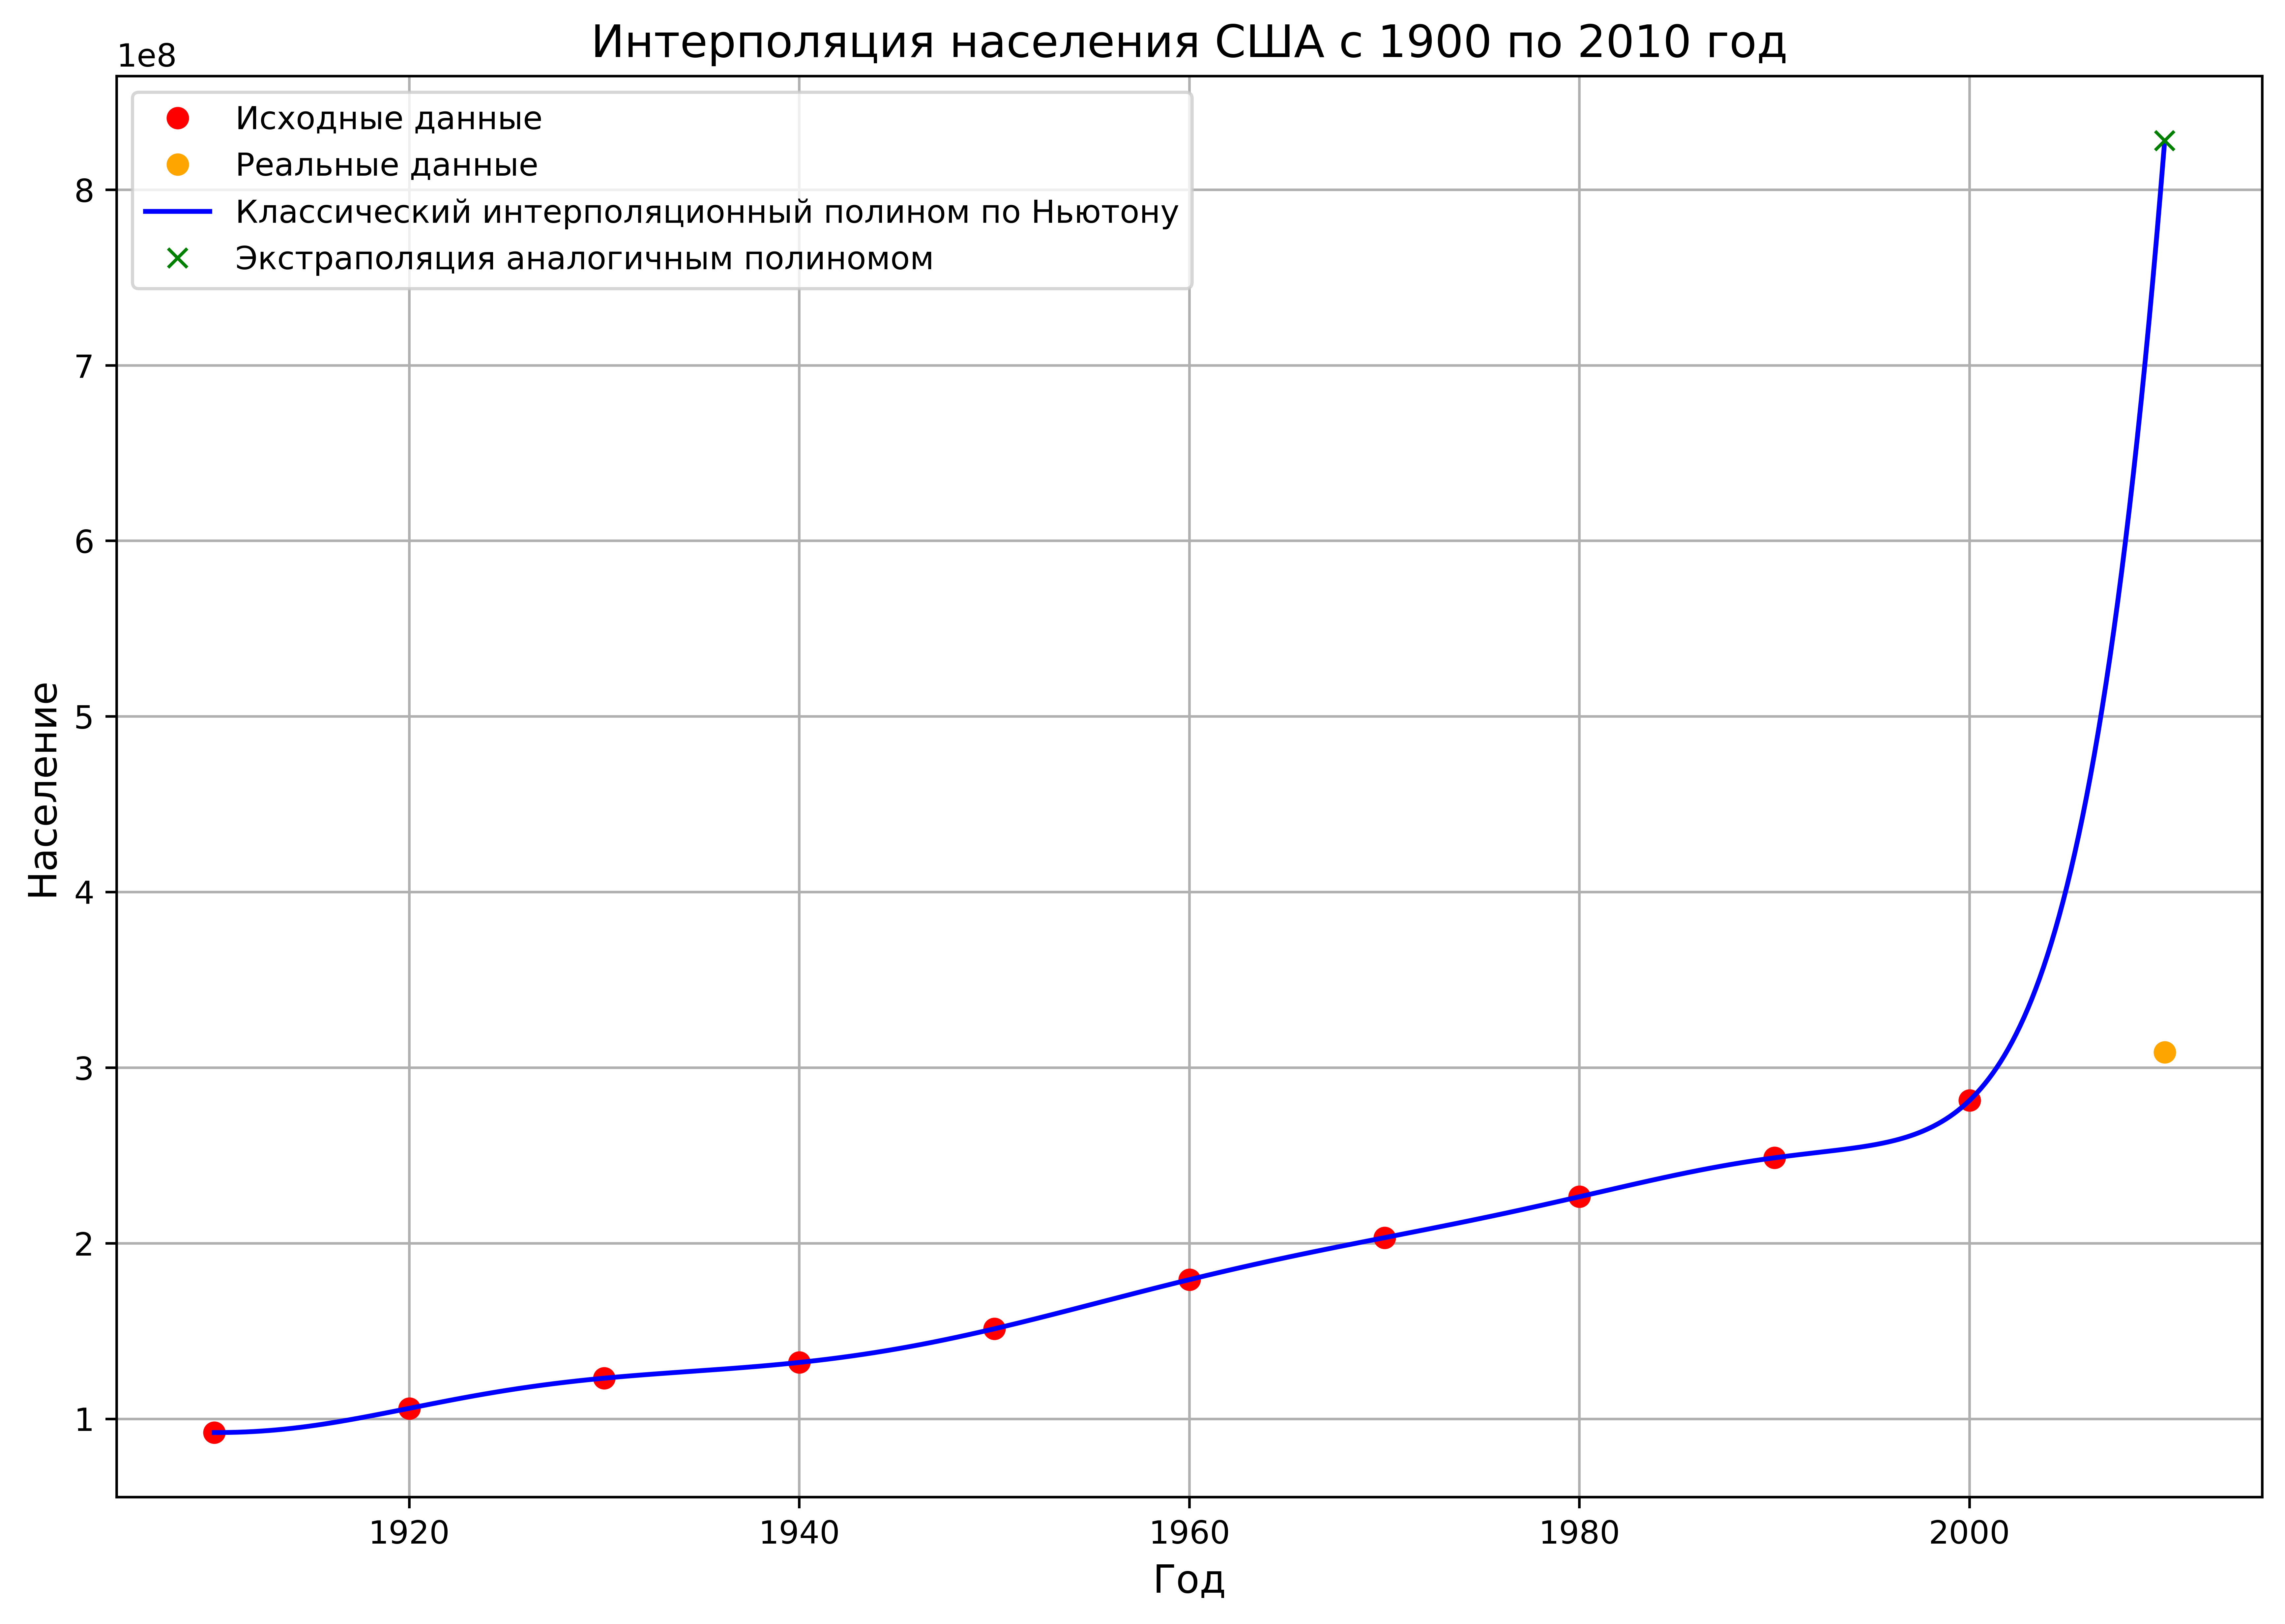

In [123]:
# Создание плотных точек для построения графика
x_dense = np.linspace(min(x), x_true, 500) # чем больше здесь точек, тем более гладкая прямая
y_dense = [newton(x, coeffs, xi) for xi in x_dense]

# Построение графика
plt.figure(figsize=(12, 8), dpi=700)

#исходные данные - заданные для интерполяции точки
plt.plot(x, y, 'o', label='Исходные данные', color='red')

#реальные данные - для проверки экстраполяции
plt.plot(x_true, y_true, 'o', label='Реальные данные', color='orange')

#производим интерполяцию по выбранным точкам
plt.plot(x_dense, y_dense, label='Классический интерполяционный полином по Ньютону', color='blue')

# проводим экстраполяцию для точки 2010
extrapolated_years = [2010]
extrapolated_populations = extrapolate
plt.plot(extrapolated_years, extrapolated_populations, 'x', label='Экстраполяция аналогичным полиномом', color='green')



plt.title('Интерполяция населения США с 1900 по 2010 год', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Население', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

Как можем видеть, этот метод для экстраполяции не подходит!
TODO выяснить причину